# Distribuições a Priori e a Posteriori

## Priori 

Tratamos $\theta$ de um modelo como uma variável aleatória e atribuimos uma distribuição para esse parâmetro. O nome será distribuição a priori. Ao fazer modelagens, ela é em geral pré-definida pelo modelador, que é em geral aconselhado por um especialista. 

## Posteriori 

Sejam $X_1, ..., X_n$ v.a. observadas e um parâmetro $\theta$ desconhecido. A distribuição de $\theta$ condicionado nas variáveis aleatórias é a distribuição a posteriori. Observe a relação com o Teorema de Bayes. 

### Teorema 

Seuponha que $X_1, ..., X_n$ formam uma amostra aleatória de uma distribuição $f(x|\theta)$. Suponha que o parâmetro seja desconhecido e que a distribuição da priori seja $\xi(\theta)$. Então, a distribuição a posteriori é:

$$\xi(\theta|x) = \frac{f(x_1|\theta)...f(x_n|\theta)\xi(\theta)}{g_n(\theta)}, \theta \in \Omega$$

Onde $g_n$ é a distribuição marginal conjunta de $X_1,...,X_n$

Observe que, essencialmente $\xi(\theta|x) \propto f(x_1|\theta)...f(x_n|\theta)\xi(\theta)$, mas que sua integral seja $1$. Queremos que essa função seja integrável e a integral sobre o domínio seja $1$. 

## Função de Verossimilhança

Quando a função de densidade de probabilidade $f_n(x|\theta)$ das observações de uma amostra aleatória é vista como uma função de $\theta$, chamamos ela de função de verossimilhança.

$$
\theta \mapsto f_n(x|\theta) := L(\theta|x)
$$

## Observações Sequenciais e Predições

Nesse caso a ordem das variáveis $X_1, ..., X_n$ importam (como uma série temporal, por exemplo). Nesse caso, podemos, iterativamente fazer: 

$$\xi(\theta|x_1) \propto f(x_1|\theta)\xi(\theta)$$
$$\xi(\theta|x_1,...,x_{n+1}) \propto f(x_n|\theta)\xi(\theta|x_1,....,x_n)$$

Isso acontece dada a independência das variáveis aleatórias.

[Notebook de Referência](https://github.com/fonnesbeck/scipy2014_tutorial/blob/master/1_Introduction-to-Bayes.ipynb)

### Frequentistas 

- Os dados observados são considerados aleatórios, realidados de um processo aleatório. 
- Os parâmetros do modelo são fixos e desconhecidos
- Queremos derivas estimadores para os parâmetros desconhecidos. 

### Bayesianos

- Os dados são fixos, isto é, vieram de um processo aleatório, mas depois eles não se alteram. 
- Os parâmetros são usualmente representados por distribuições, são variáveis aleatórias. 
- Fórmula de Bayes. 

#### Simples exemplo de inferência Bayesiana 

Hemofilia é uma disordem genética que prejudica a coagulação em resposta a rupturas em vasos sanguíneos. É recessiva ligada ao cromossomo X. Isso implica que homens com 1 gene são afetados, enquanto as mulheres são afetadas, mas portadoras.  

Considere uma mulher cuja mãe é portadora e tem um irmão afetado. Ela se casa com um homem não afetado. A mulher tem dois filhos consecutivos que não são afetados. Será que a mãe é portadora?

A pergunra é simples. Vamos tentar usar um pouco do que sabemos. Seja $W = 1$ se a mulher é afetada e $W = 0$ se ela não for afetada. Queremos saber $P(W = 1|s_1 = 0, s_2 = 0)$, isto é, os filhos não são afetados. 

Que informação nós temos ? A mãe dela é portadora, portanto uma priori interessante é:

$$P(W = 1) = 0.5 \Rightarrow O(W = 1) = \frac{P(W=1)}{P(W=0)} = 1 \text{ chances a priori }$$

Podemos calcular a função de verossimilhança: 

$$L(W = 1|s_1 = 0, s_2 = 0) = (0.5)(0.5) = 0.25$$
$$L(W = 0|s_1 = 0, s_2 = 0) = (1)(1) = 1$$

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
priori = 0.5
p = 0.5 

Likelihood = lambda w, s: np.prod([(1 - i, p**i*(1-p)**(1 - i))[w]for i in s])

s = [0,0]

posteriori = Likelihood(1,s)*priori/(Likelihood(1,s)*priori + Likelihood(0,s)*(1 - priori))
print("A probabilidade da mãe portar é {} com dois filhos não portadores.".format(posteriori))

A probabilidade da mãe portar é 0.2 com dois filhos não portadores.


In [29]:
s = [0]  # terceiro filho 

priori = posteriori

posteriori = Likelihood(1,s)*priori/(Likelihood(1,s)*priori + Likelihood(0,s)*(1 - priori))
print("A probabilidade da mãe portar é {:.3f} com três filhos não portadores.".format(posteriori))

A probabilidade da mãe portar é 0.111 com três filhos não portadores.


Text(0.5, 1.0, 'Probabailidade dado cada filho')

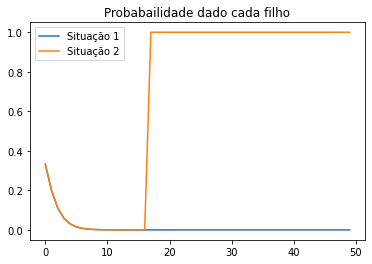

In [36]:
priori = 0.5
p = 0.5 
s = [0]
posteriori = []
for i in range(50): 
    posteriori.append(Likelihood(1,s)*priori/(Likelihood(1,s)*priori + Likelihood(0,s)*(1 - priori)))
    priori = posteriori[-1]

priori = 0.5 
posteriori2 = []
for i in range(50): 
    posteriori2.append(Likelihood(1,s)*priori/(Likelihood(1,s)*priori + Likelihood(0,s)*(1 - priori)))
    priori = posteriori2[-1]
    s = [np.random.choice([0,1], p = (0.9, 0.1))]

plt.plot(range(50), posteriori, label = 'Situação 1')
plt.plot(range(50), posteriori2, label = 'Situação 2')
plt.legend()
plt.title('Probabailidade dado cada filho')

## Princípio de Verossimilhança

Afirma que para uma inferência sobre um parâmetro $\theta$, **toda evidência de qualquer observação** de uma variável aleatória $X = x$ com distribuição $X \sim f(x|\theta)$ se encontra na função de verossimilhança $L(\theta|x)$.

A interpretação é de que qualquer observação de $X$ pode construir conclusões sobre $\theta$. Além disso, se pudéssemos obter informação de $\theta$ sobre outra variável aleatória $Y$ com verossimilhança $\tilde{L}$, teremos que $L(\theta|x) = c\cdot \tilde{L}(\theta|y)$. Isto é, as conclusões sobre o parâmetro  não dependem da observação feita. 

**Qual o problema?**

[Jeffreys](https://en.wikipedia.org/wiki/Harold_Jeffreys): 
An hypothesis that may be true is rejected because it has failed to predict observable results that have not occurred. 